USING THE DATA: ASIK RT4 NWIN CLND BLNCD


RT4: 64 scans,

NWIN: WITH NEW INDO SAMPLES SCANS,

CLND: CLEANED FROM OUTLIERS,

BLNCD: THE TOTAL NUMBER ALREADY BALANCED BETWEEN THAI AND NON-THAI

In [1]:
import pandas as pd
import numpy as np

# Retry loading the data_0set
data_0 = pd.read_csv(r"C:\Users\pingk\Downloads\fadhli nitip\asik_rt4_NWIN_CLND_BLNCD_2.csv")

# Check the columns and first few rows of the data_0
data_0_info = data_0.info()
data_0_head = data_0.head()

# Check for empty cells and NaN values
nan_summary = data_0.isna().sum()

data_0_info, data_0_head, nan_summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Columns: 6960 entries, prov_char to predictions
dtypes: float64(6950), int64(2), object(8)
memory usage: 16.1+ MB


(None,
   prov_char country_char               wavenumber   649.893   650.376  \
 0       SUX           ID  ID-SUX-069-2309-002_005  0.019580  0.020577   
 1       SUX           ID  ID-SUX-074-2311-001_005  0.015026  0.014997   
 2       KTX           ID  ID-KTX-068-2306-002_104  0.007675  0.007844   
 3       SGR           MY  MY-SGR-096-2401-002_NCB  0.007805  0.006585   
 4       SSX           ID  ID-SSX-068-2307-028_202  0.011577  0.012206   
 
     650.858    651.34   651.822   652.304   652.786  ...  3999.158   3999.64  \
 0  0.021276  0.021531  0.021289  0.020601  0.019603  ...  0.000612  0.000631   
 1  0.015173  0.015566  0.016130  0.016762  0.017332  ... -0.000344 -0.000257   
 2  0.008136  0.008477  0.008800  0.009070  0.009293  ...  0.002002  0.002076   
 3  0.005669  0.005116  0.004945  0.005136  0.005631  ...  0.001007  0.001068   
 4  0.012885  0.013565  0.014162  0.014576  0.014721  ...  0.000027  0.000041   
 
    4000.122  tgp_name  dgp_name  fgp_name  country_name  t

In [2]:
print(data_0.describe(include='all'))

       prov_char country_char               wavenumber     649.893  \
count        304          304                      304  304.000000   
unique        24            3                      302         NaN   
top          KTX           TH  ID-SSX-068-2307-028_001         NaN   
freq          41          152                        2         NaN   
mean         NaN          NaN                      NaN    0.013914   
std          NaN          NaN                      NaN    0.008246   
min          NaN          NaN                      NaN   -0.076966   
25%          NaN          NaN                      NaN    0.012156   
50%          NaN          NaN                      NaN    0.014559   
75%          NaN          NaN                      NaN    0.017111   
max          NaN          NaN                      NaN    0.025054   

           650.376     650.858      651.34     651.822     652.304  \
count   304.000000  304.000000  304.000000  304.000000  304.000000   
unique         NaN 

In [3]:
data_1 = data_0.copy()

In [4]:
# Delete the specified columns
data_1 = data_0.drop(columns=['thnoth_name_encoded', 'predictions', 'country_char'])

# Rename the column 'wavenumber' to 'sample_code'
data_1 = data_1.rename(columns={'wavenumber': 'sample_code'})

# Display the first few rows of the modified data_1frame
print(data_1.head())

  prov_char              sample_code   649.893   650.376   650.858    651.34  \
0       SUX  ID-SUX-069-2309-002_005  0.019580  0.020577  0.021276  0.021531   
1       SUX  ID-SUX-074-2311-001_005  0.015026  0.014997  0.015173  0.015566   
2       KTX  ID-KTX-068-2306-002_104  0.007675  0.007844  0.008136  0.008477   
3       SGR  MY-SGR-096-2401-002_NCB  0.007805  0.006585  0.005669  0.005116   
4       SSX  ID-SSX-068-2307-028_202  0.011577  0.012206  0.012885  0.013565   

    651.822   652.304   652.786   653.268  ...  3998.194  3998.676  3999.158  \
0  0.021289  0.020601  0.019603  0.018484  ...  0.000519  0.000571  0.000612   
1  0.016130  0.016762  0.017332  0.017710  ... -0.000411 -0.000396 -0.000344   
2  0.008800  0.009070  0.009293  0.009507  ...  0.001873  0.001933  0.002002   
3  0.004945  0.005136  0.005631  0.006331  ...  0.001088  0.001014  0.001007   
4  0.014162  0.014576  0.014721  0.014544  ... -0.000060 -0.000010  0.000027   

    3999.64  4000.122  tgp_name  dgp_n

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

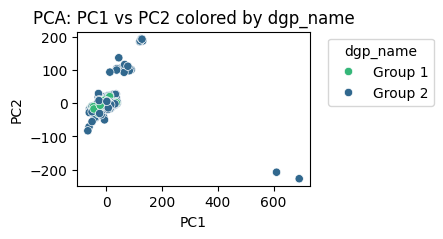

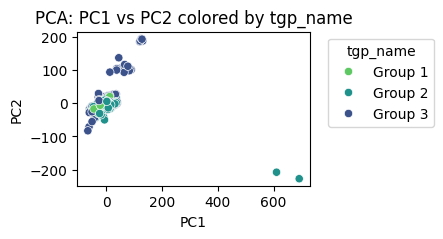

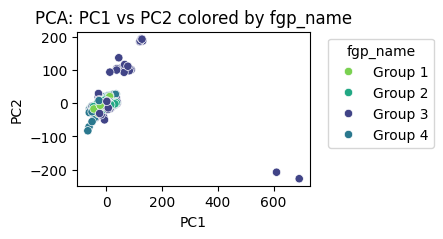

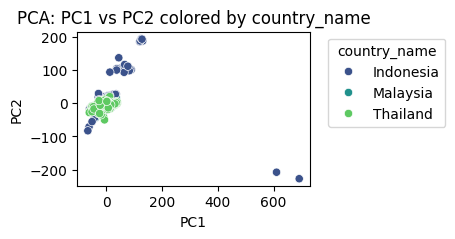

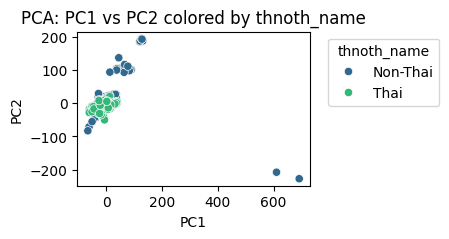

In [6]:
# Separate features and target variables
features = data_1.drop(columns=['prov_char', 'sample_code', 'tgp_name', 'dgp_name', 'fgp_name', 'country_name', 'thnoth_name'])
targets_dgp = data_1['dgp_name']
targets_tgp = data_1['tgp_name']
targets_fgp = data_1['fgp_name']
targets_country = data_1['country_name']
targets_thnoth = data_1['thnoth_name']

# Standardize the features
scaler_1 = StandardScaler()
X_scaled_1 = scaler_1.fit_transform(features)

# Perform PCA_1
pca_1 = PCA(n_components=4)
pca_1_result = pca_1.fit_transform(X_scaled_1)
pca_1_df = pd.DataFrame(data=pca_1_result, columns=['PC1', 'PC2', 'PC3', 'PC4'])

# Add target columns for coloring
pca_1_df['dgp_name'] = targets_dgp
pca_1_df['tgp_name'] = targets_tgp
pca_1_df['fgp_name'] = targets_fgp
pca_1_df['country_name'] = targets_country
pca_1_df['thnoth_name'] = targets_thnoth

# Plotting function
def plot_pca_1(x, y, color_by):
    plt.figure(figsize=(3, 2))
    scatter = sns.scatterplot(data=pca_1_df, x=x, y=y, hue=color_by, palette='viridis')
    plt.title(f'PCA: {x} vs {y} colored by {color_by}')
    plt.xlabel(x)
    plt.ylabel(y)
    
    # Set legend in alphabetical order
    handles, labels = scatter.get_legend_handles_labels()
    sorted_labels = sorted(zip(labels, handles), key=lambda t: t[0])
    labels, handles = zip(*sorted_labels)
    plt.legend(handles, labels, title=color_by, bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.show()

# Plotting the PCA results
plot_pca_1('PC1', 'PC2', 'dgp_name')
plot_pca_1('PC1', 'PC2', 'tgp_name')
plot_pca_1('PC1', 'PC2', 'fgp_name')
plot_pca_1('PC1', 'PC2', 'country_name')
plot_pca_1('PC1', 'PC2', 'thnoth_name')

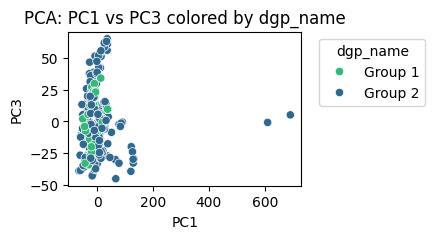

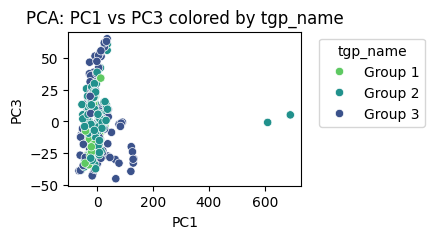

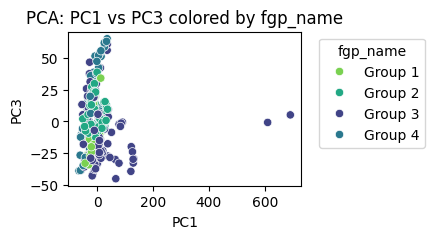

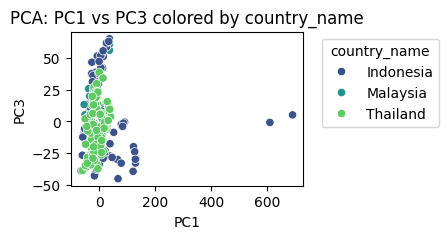

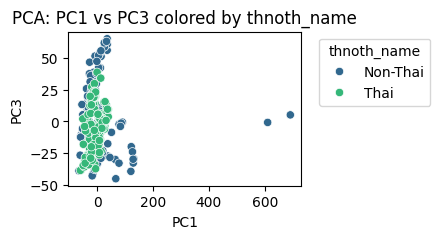

In [7]:
plot_pca_1('PC1', 'PC3', 'dgp_name')
plot_pca_1('PC1', 'PC3', 'tgp_name')
plot_pca_1('PC1', 'PC3', 'fgp_name')
plot_pca_1('PC1', 'PC3', 'country_name')
plot_pca_1('PC1', 'PC3', 'thnoth_name')

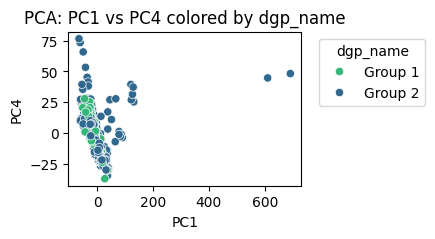

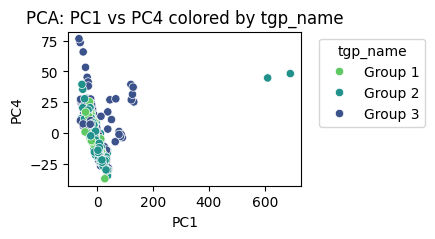

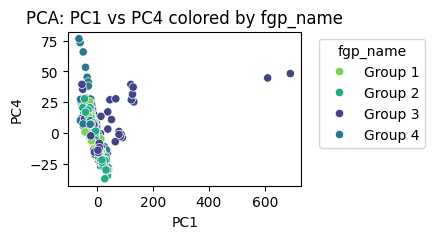

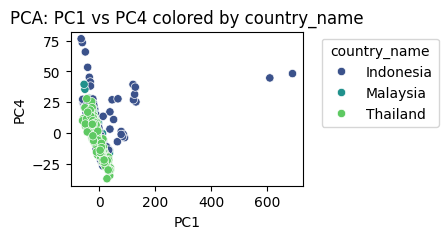

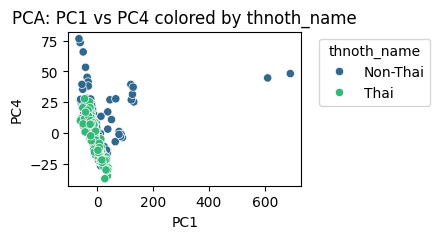

In [8]:
plot_pca_1('PC1', 'PC4', 'dgp_name')
plot_pca_1('PC1', 'PC4', 'tgp_name')
plot_pca_1('PC1', 'PC4', 'fgp_name')
plot_pca_1('PC1', 'PC4', 'country_name')
plot_pca_1('PC1', 'PC4', 'thnoth_name')

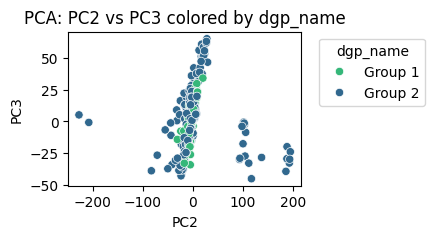

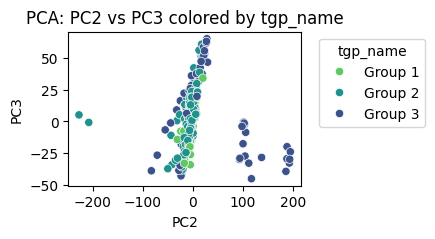

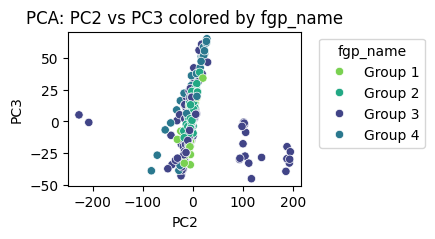

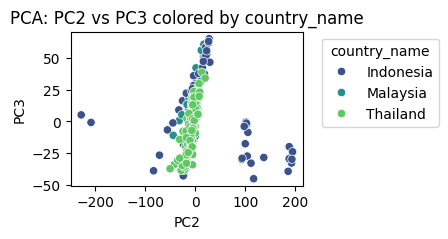

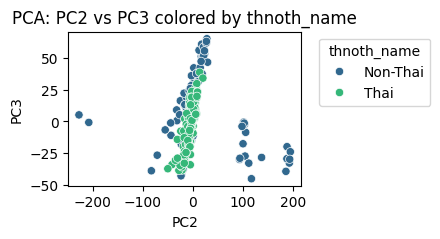

In [9]:
plot_pca_1('PC2', 'PC3', 'dgp_name')
plot_pca_1('PC2', 'PC3', 'tgp_name')
plot_pca_1('PC2', 'PC3', 'fgp_name')
plot_pca_1('PC2', 'PC3', 'country_name')
plot_pca_1('PC2', 'PC3', 'thnoth_name')

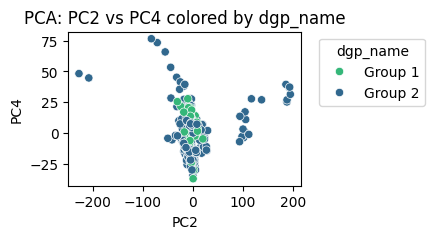

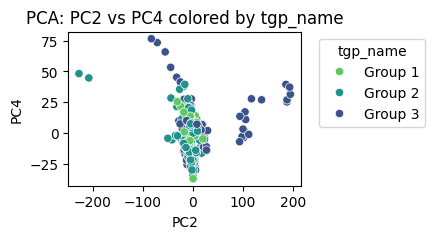

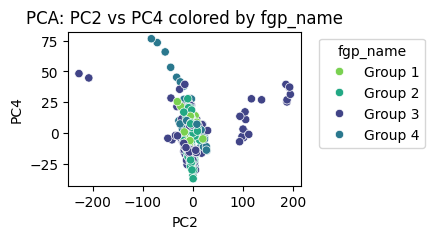

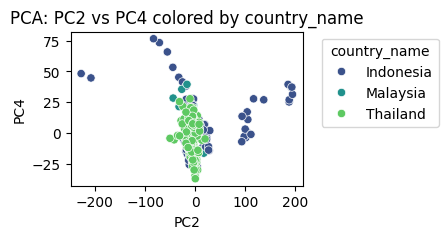

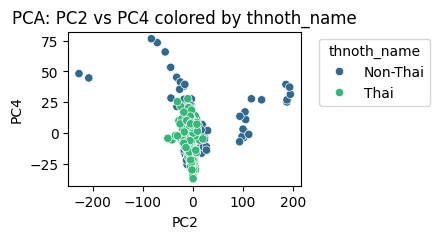

In [10]:
plot_pca_1('PC2', 'PC4', 'dgp_name')
plot_pca_1('PC2', 'PC4', 'tgp_name')
plot_pca_1('PC2', 'PC4', 'fgp_name')
plot_pca_1('PC2', 'PC4', 'country_name')
plot_pca_1('PC2', 'PC4', 'thnoth_name')

In [15]:
# Get the wavenumbers from the columns
wavenumbers = features.columns.astype(float)

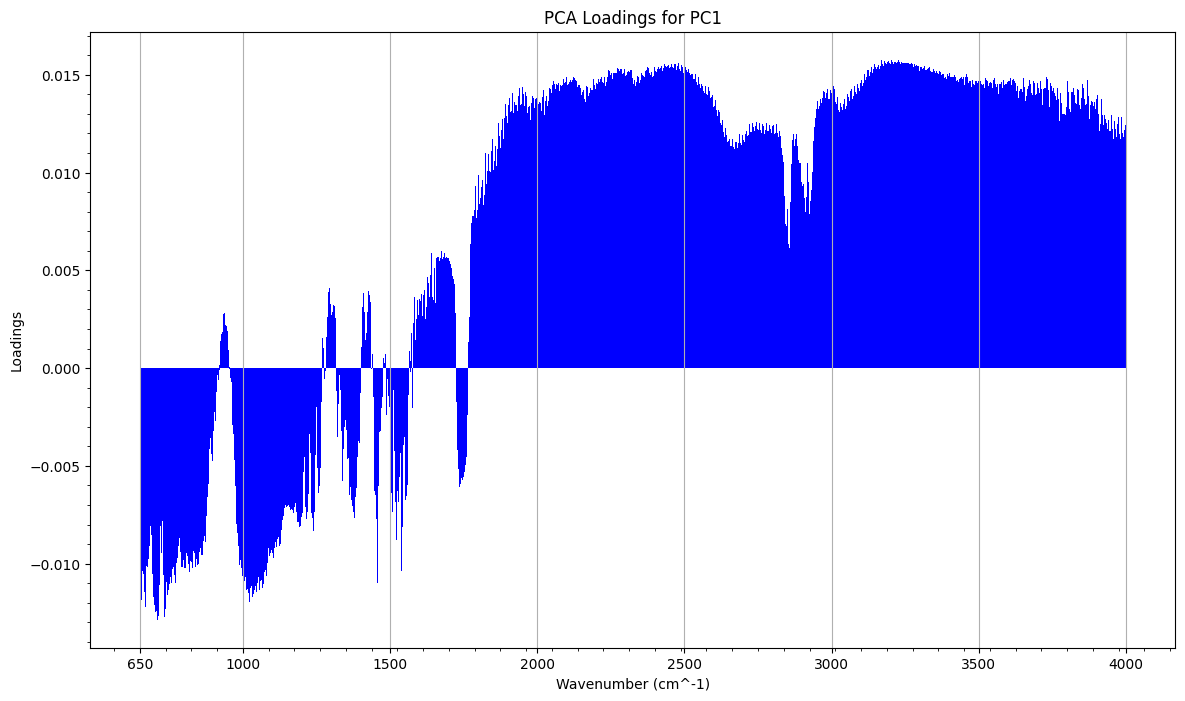

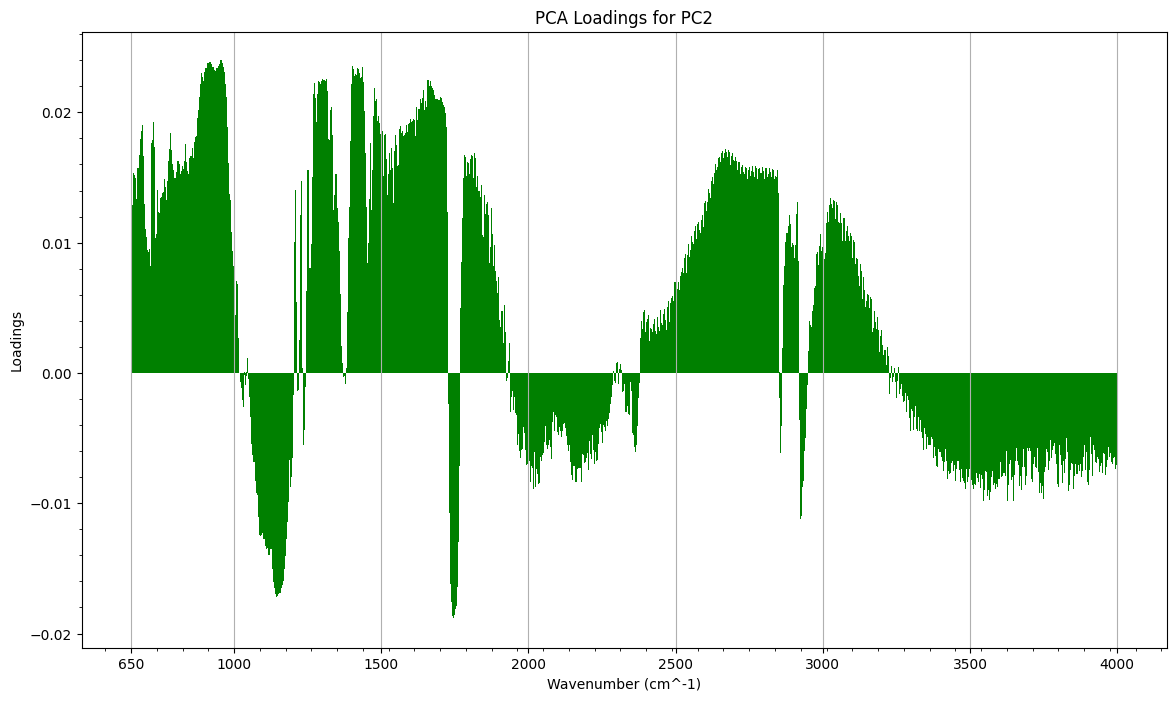

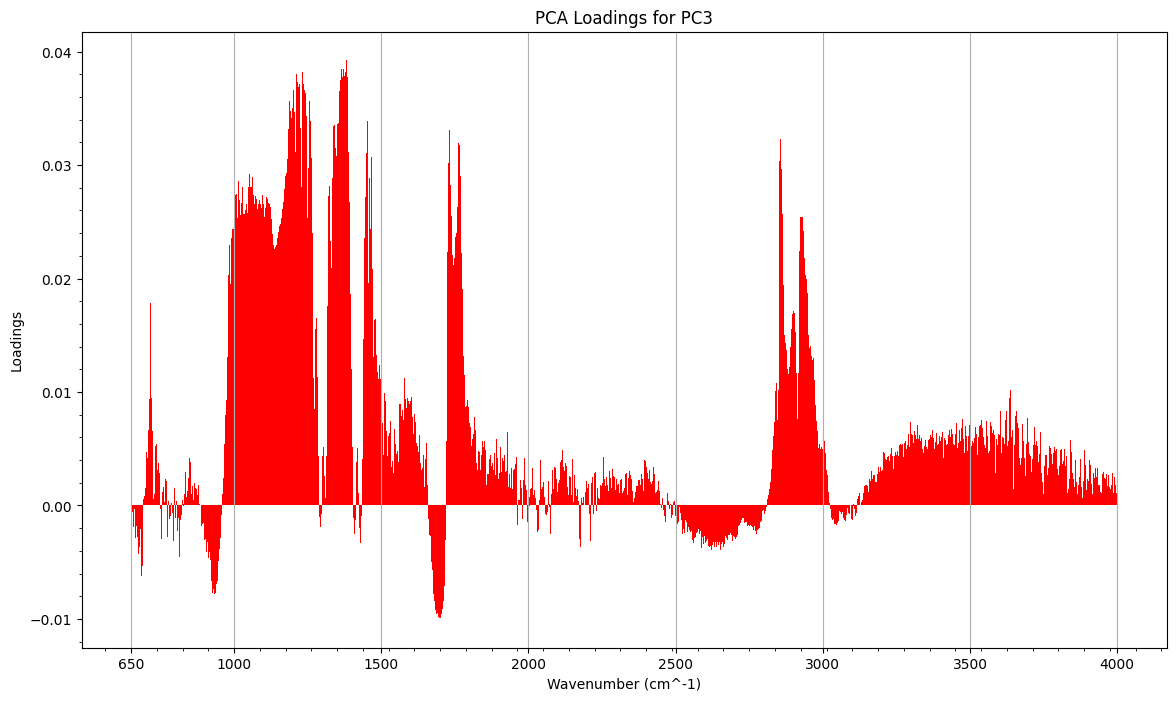

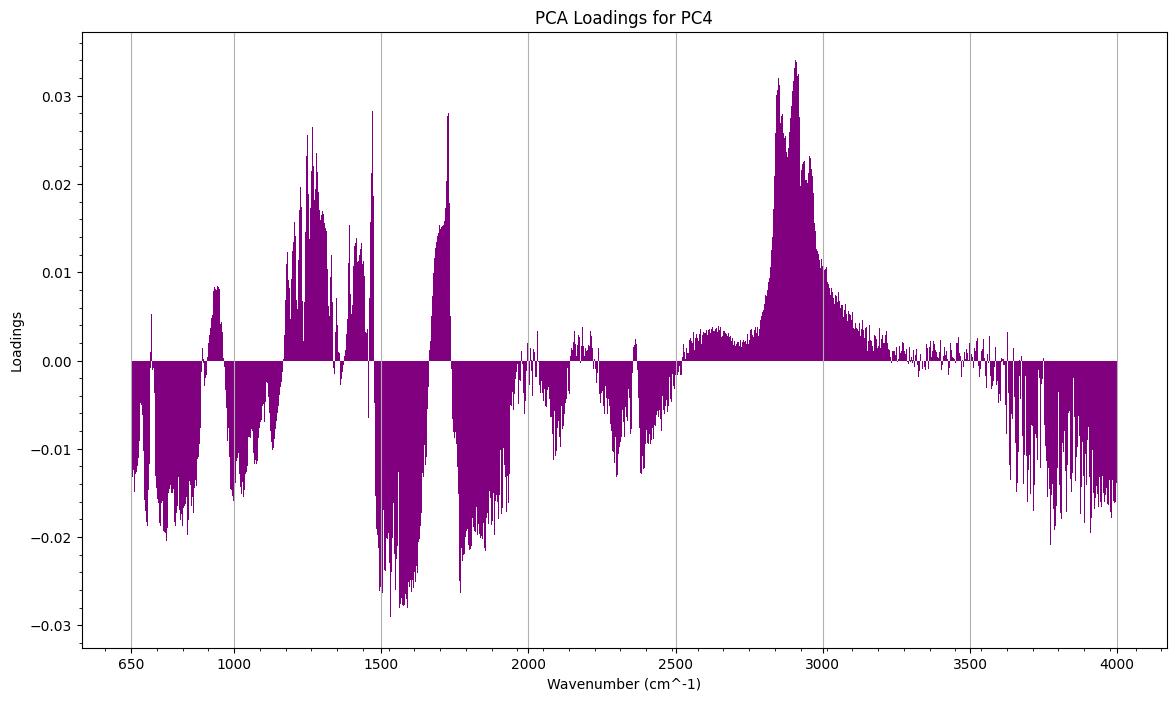

              PC1       PC2       PC3       PC4
649.893 -0.010984  0.012924 -0.001936 -0.016518
650.376 -0.011003  0.013002 -0.001367 -0.016903
650.858 -0.011076  0.013073 -0.000767 -0.017130
651.340 -0.011192  0.013127 -0.000208 -0.017146
651.822 -0.011332  0.013152  0.000253 -0.016932


In [16]:
# Get the loadings
loadings_1 = pca_1.components_

# Create a DataFrame for the loadings
loadings_1_df = pd.DataFrame(loadings_1.T, columns=['PC1', 'PC2', 'PC3', 'PC4'], index=wavenumbers)

# Plot the PCA loadings one by one
def plot_loadings_1(component, color):
    plt.figure(figsize=(14, 8))
    plt.bar(loadings_1_df.index, loadings_1_df[component], color=color)
    plt.title(f'PCA Loadings for {component}')
    plt.xlabel('Wavenumber (cm^-1)')
    plt.ylabel('Loadings')
    plt.xticks(ticks=[4000, 3500, 3000, 2500, 2000, 1500, 1000, 650], labels=[4000, 3500, 3000, 2500, 2000, 1500, 1000, 650])
    plt.minorticks_on()
    plt.grid(True, axis='x')
    plt.show()

# Plot loadings for PC1
plot_loadings_1('PC1', 'blue')

# Plot loadings for PC2
plot_loadings_1('PC2', 'green')

# Plot loadings for PC3
plot_loadings_1('PC3', 'red')

# Plot loadings for PC4
plot_loadings_1('PC4', 'purple')

# Display the loadings DataFrame
print(loadings_1_df.head())

In [17]:
# Create a DataFrame to hold the top 30 most influencing wavenumbers for each principal component
top_loadings = {}

for component in loadings_1_df.columns:
    # Get the absolute loadings and sort them in descending order
    sorted_loadings = loadings_1_df[component].abs().sort_values(ascending=False)
    # Get the top 30 most influencing wavenumbers
    top_wavenumbers = sorted_loadings.head(30).index
    top_values = sorted_loadings.head(30).values
    top_loadings[component] = pd.DataFrame({'Wavenumber': top_wavenumbers, 'Loading': top_values})

# Display the top 30 most influencing wavenumbers for each principal component
top_loadings_1_df = pd.concat(top_loadings, axis=1)
top_loadings_1_df.columns = ['PC1 Wavenumber', 'PC1 Loading', 'PC2 Wavenumber', 'PC2 Loading', 'PC3 Wavenumber', 'PC3 Loading', 'PC4 Wavenumber', 'PC4 Loading']

# Save the table to a CSV file
#top_loadings_1_df.to_csv('/mnt/data/top_30_influencing_wavenumbers.csv', index=False)

top_loadings_1_df.head()

,PC1 Wavenumber,PC1 Loading,PC2 Wavenumber,PC2 Loading,PC3 Wavenumber,PC3 Loading,PC4 Wavenumber,PC4 Loading
0,3204.148,0.015767,955.073,0.024040,1382.711,0.039285,2908.128,0.034084
1,3203.666,0.015766,954.591,0.024039,1382.229,0.039278,2908.610,0.034077
2,3204.630,0.015756,955.555,0.024037,1383.193,0.039228,2907.646,0.034059
3,3203.183,0.015750,954.109,0.024033,1381.747,0.039223,2909.092,0.034041
4,3181.006,0.015742,956.038,0.024029,1381.264,0.039118,2907.164,0.034002


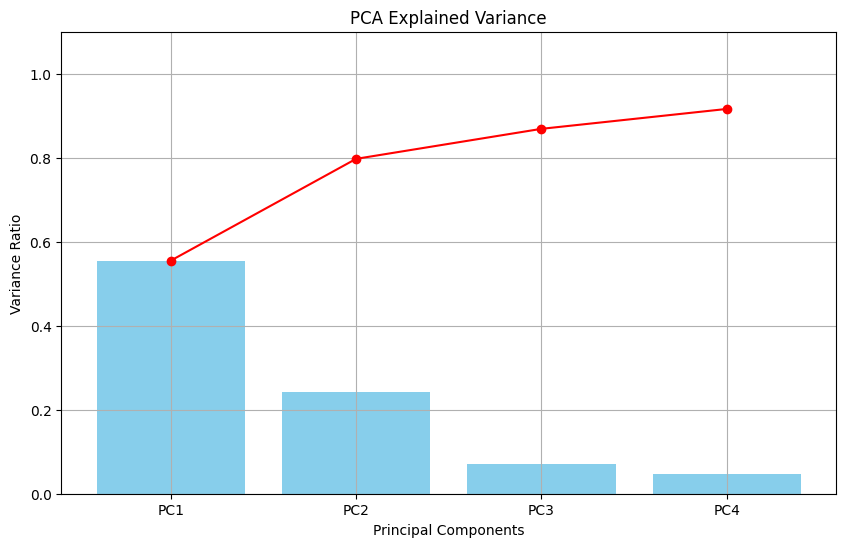

  Principal Component  Explained Variance Ratio  Cumulative Explained Variance
0                 PC1                  0.554849                       0.554849
1                 PC2                  0.242450                       0.797299
2                 PC3                  0.071498                       0.868797
3                 PC4                  0.047364                       0.916161


In [18]:
# Get the explained variance ratios
explained_variance_ratios_1 = pca_1.explained_variance_ratio_

# Create a DataFrame for the explained variance ratios
explained_variance_1_df = pd.DataFrame({
    'Principal Component': ['PC1', 'PC2', 'PC3', 'PC4'],
    'Explained Variance Ratio': explained_variance_ratios_1
})

# Calculate cumulative explained variance
explained_variance_1_df['Cumulative Explained Variance'] = explained_variance_1_df['Explained Variance Ratio'].cumsum()

# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.bar(explained_variance_1_df['Principal Component'], explained_variance_1_df['Explained Variance Ratio'], color='skyblue')
plt.plot(explained_variance_1_df['Principal Component'], explained_variance_1_df['Cumulative Explained Variance'], marker='o', color='red')
plt.title('PCA Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Variance Ratio')
plt.ylim(0, 1.1)
plt.grid(True)
plt.show()

# Display the explained variance DataFrame
print(explained_variance_1_df)